<a href="https://colab.research.google.com/github/xxxzty/MH3520_Mathematics_of_Deep_Learning/blob/main/02_problemset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Problemset 

**Hint:** You may copy and adapt some code from the [TensorFlow 2 Quickstart for Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). 

**Instructions:** Fill in the missing code, which is marked by `# TODO`. If you can, run this notebook on a GPU. On Google Colab, you can do this by selecting Runtime > Change Runtime Type > Hardware Acceleration > GPU. Start by loading the necessary libraries as follows:



In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 2.4 Defining and plotting a simple multi-layer perceptron

Define a `tf.keras.model` to represent multi-layer perceptrons of the form
$$f(x)=\sum_{i=1}^{50} w_i \rho(a_i x+b_i),$$
where $x,w_i,a_i,b_i$ are real numbers, and $\rho(x)=\max\{0,x\}$.

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


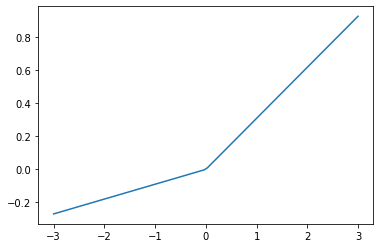

In [ ]:
model = tf.keras.models.Sequential([
  # TODO add input and dense layers here
  tf.keras.layers.Input(shape=1),
  tf.keras.layers.Dense(50, activation='relu', name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer')
  
])

model.compile()
model.summary()
plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.show()

You should see a piecewise linear function with a single kink at zero. This is not a coincidence: the bias of both layers has been initialized to zero. Here is how you can verify this: 

In [ ]:
# bottom (input) layer
model.get_layer(index=0).weights

[<tf.Variable 'input_layer/kernel:0' shape=(1, 50) dtype=float32, numpy=
 array([[-0.04805234, -0.2185728 , -0.26871797, -0.2956513 , -0.16373263,
          0.22968134, -0.34253332,  0.15763083,  0.18858573,  0.29608062,
          0.32303348,  0.0997625 ,  0.14592832,  0.31345174, -0.01531091,
         -0.22578707, -0.21481065,  0.29901394,  0.27084336, -0.14318137,
         -0.25961843,  0.0118714 , -0.10400975,  0.33535632, -0.2038047 ,
         -0.12937963, -0.13139781,  0.13283208, -0.28131866, -0.20981221,
         -0.15661028,  0.16153553,  0.22627708,  0.31186268,  0.2879198 ,
         -0.12284525, -0.14037004, -0.17591166, -0.29869634, -0.15227218,
          0.04775631,  0.08777988,  0.28347102,  0.05453864,  0.01977038,
         -0.3311531 , -0.08735105,  0.19567034,  0.14866206,  0.2863727 ]],
       dtype=float32)>,
 <tf.Variable 'input_layer/bias:0' shape=(50,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 

In [ ]:
# top (output) layer
model.get_layer(index=1).weights

[<tf.Variable 'output_layer/kernel:0' shape=(50, 1) dtype=float32, numpy=
 array([[ 0.3122312 ],
        [ 0.25986496],
        [-0.13198186],
        [-0.18502374],
        [-0.24099112],
        [ 0.15735438],
        [ 0.11085275],
        [-0.12076108],
        [-0.23043887],
        [ 0.13313106],
        [ 0.30018106],
        [ 0.11095741],
        [ 0.1266025 ],
        [-0.03661412],
        [ 0.19607285],
        [ 0.00196707],
        [-0.21255435],
        [-0.0048039 ],
        [-0.07668841],
        [ 0.22239527],
        [-0.0702107 ],
        [ 0.23092905],
        [-0.17497541],
        [ 0.0625222 ],
        [ 0.10768422],
        [ 0.09086534],
        [-0.09275153],
        [-0.12729546],
        [-0.2960264 ],
        [ 0.13242036],
        [-0.30098575],
        [ 0.16117474],
        [ 0.29241946],
        [ 0.26928803],
        [ 0.10925624],
        [-0.18723622],
        [ 0.0677973 ],
        [ 0.10119113],
        [ 0.09246162],
        [-0.20258966],
      

## 2.5 Random initialization of network coefficients

By default, the kernel coefficients $w_i$ and $a_i$ are initialized at random, whereas the bias coefficients $b_i$ are set to zero. To change this, set  `bias_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)` when constructing the layers; see [here](https://keras.io/api/layers/initializers/#randomnormal-class) for instructions.

In [ ]:
model = tf.keras.models.Sequential([
  # TODO add layers with random bias here
])

model.compile()

plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.show()

Execute the above cell several times. You should now see a piecewise linear function, which changes each time you run the code. The function will have a lot of kinks (how many?) and may look quite smooth for this reason.

## 2.6 Learning a sine function

The goal here is to learn the sine function.

In [ ]:
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()

The learning algorithm gets access to the ground truth (i.e., the sine function) only via noisy random samples. Specifically, it will be fed $N=10^3$ random samples $(x_i,y_i)$, where $x_i$ is uniformly distributed on the interval $[-3,3]$, and where $y_i=\sin(x_i)+\epsilon_i$ for some normally distributed $\epsilon_i$ with mean zero and standard deviation $1/10$. 

In [ ]:
N = 1000
x_train = np.random.uniform(low=-3, high=3, size=N)
y_train = np.sin(x_train)+np.random.normal(loc=0.0, scale=0.1, size=N)
plt.plot(x_train, y_train, '.g')

We are now ready to train the model. To this aim, `compile` the model as you did before, but specify `tf.keras.optimizers.Adam()` as optimizer and `tf.keras.losses.MeanSquaredError()` as loss function. Then, `fit` the model using 100 epochs. The tutorial [TensorFlow 2 Quickstart for Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb) explains how to do this. As an aside, to suppress the lengthy output of the `fit` command, you can set `verbose=0`.

In [ ]:
# TODO compile and then fit the model

plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()

## 2.7 Freezing the coefficients of the lower layer

To a large extent, deep learning is linear regression with random features. To see this, freeze the coefficients of the bottom layer during training as explained [here](https://keras.io/api/layers/base_layer/#trainable-property). As the model is linear in the top-layer coefficients $w_i$, training then reduces to a linear regression problem. Of course, the regression will work well only if the random features are well-chosen. In the present setting, this means that you **must** randomly initialize the bias as in problem 2.4. (Feel free to try.)

In [ ]:
model = tf.keras.models.Sequential([
  # TODO add layers with random bias as in problem 2.5 
])

# set trainable = False for the coefficients of the bottom layer

# train the model as you did in problem 2.6

plt.plot(np.linspace(-3, 3, 100), model.predict(np.linspace(-3, 3, 100)))
plt.plot(np.linspace(-3, 3, 100), np.sin(np.linspace(-3, 3, 100)), 'r')
plt.show()